## Markov Chain Monte Carlo Simulation of the Ising Model with the Metropolis-Hasting's Algorithm

In [2]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt
%matplotlib inline


## 1) 1-D Ising Model Simulation: Ferromagnetic coupling with no external magnetic field                                                            
  ##                              (Single example with fixed temperature)

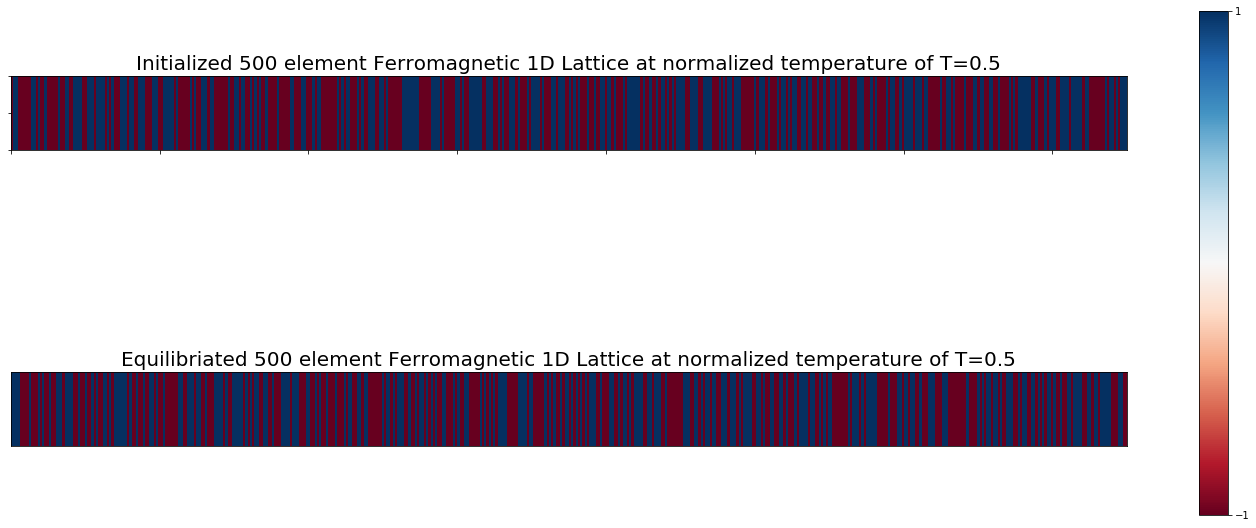

		Energy at equilibrium is: 40.0
		Average energy over evolution of the system: -0.0039168
		Average magnetization: 0.0051056


In [11]:
J=1 #coupling parameter
steps=5000 #number of monte carlo steps
grid_size=500 #lattice size
grid=np.random.choice([-1,1],size=grid_size) #initialize lattice

def H(array):  #function to compute hamiltonian / energy of the lattice
    e=-np.sum(J*array*np.roll(array,1)+J*array*np.roll(array,-1))/2
    return e

def M(array): #function to calculate magnetization of the lattice
    return np.sum(array)


def delta_E(array,x): #change in energy caused by single spin switch (only nearest neighbour interactions)
    return 2*J*(array[x]*array[(x-1)%grid_size]+array[x]*array[(x+1)%grid_size])

def acceptance_probability(array,x,T): #acceptance ratio (symmetric proposal distribution on markov chain)
    return np.exp((delta_E(array,x)))/T

def monte_carlo(array,T): #monte carlo step with metropolis-hastings algorithm
        index=np.random.randint(grid_size) #pick a random spin site
        random=np.random.rand() #generate random number for acceptance test
        if delta_E(array,index)<0: # flip spin and accept new configuration if change in energy is negative
            array[index]*=-1
        elif random<acceptance_probability(array,index,T): #or accept with probability in accordance with acceptance criterion
            array[index]*=-1
        return array

def image_convert(array):
    image_xvalues=[] #manipulate 1-D array into an equivalent 2-D array to display as image (stretch along x and y axis)
    for element in array:
        for n in range(30):
            image_xvalues.append(element)
    converted=np.array([image_xvalues]*1000)
    return converted

initial_image=image_convert(grid)

E=0
Mag=0
for i in range(steps): #run monte carlo process till equilibriation
    eq=monte_carlo(grid,0.1)
    E+=H(eq)
    Mag+=M(eq)

eq_energy=H(eq) #energy at equilibrium
H_average=E/(steps*grid_size) #average energy per site over the evolution of the system
M_average=Mag/(steps*grid_size) #average magnetization per site over the evolution of the system (order parameter)

eq_image=image_convert(eq)

fig=plt.figure(figsize=(20,10)) #display stuff. Every 'band' in the image is a spin site.
ax=fig.add_subplot(212) 
ax2=fig.add_subplot(211)
cax2=ax2.imshow(initial_image,cmap=plt.cm.RdBu)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False) 
ax2.set_title('Initialized 500 element Ferromagnetic 1D Lattice at normalized temperature of T=0.5',size=20)
ax.set_title('Equilibriated 500 element Ferromagnetic 1D Lattice at normalized temperature of T=0.5',size=20)
cax=ax.imshow(eq_image,cmap=plt.cm.RdBu)
plt.setp(ax.get_yticklabels(), visible=False)
plt.setp(ax.get_xticklabels(), visible=False)   
ax.tick_params(bottom=False, left=False)
cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
fig.colorbar(cax, cax=cbar_ax,ticks=[-1,1])
plt.show()

print('\t\tEnergy at equilibrium is: {}'.format(eq_energy))
print('\t\tAverage energy over evolution of the system: {}'.format(H_average))
print('\t\tAverage magnetization: {}'.format(M_average))

## 2) Temperature dependent evolution of the 1-D Ising Model